In [1]:
# 1.Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2.Load Data
sales = pd.read_csv("sales_data.csv")
customers = pd.read_csv("customer_data.csv")

print("Sales shape :",sales.shape)
print("Costomers shape :",customers.shape)

sales.head()

Sales shape : (100, 7)
Costomers shape : (500, 9)


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [3]:
# 3. Data Exploration
print(sales.info())
print(customers.info())

print("\nMissing values (sales):\n",sales.isnull().sum())
print("\nMissing values (customers):\n",customers.isnull().sum())



<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         100 non-null    str  
 1   Product      100 non-null    str  
 2   Quantity     100 non-null    int64
 3   Price        100 non-null    int64
 4   Customer_ID  100 non-null    str  
 5   Region       100 non-null    str  
 6   Total_Sales  100 non-null    int64
dtypes: int64(3), str(4)
memory usage: 5.6 KB
None
<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        500 non-null    str  
 1   Tenure            500 non-null    int64
 2   MonthlyCharges    500 non-null    int64
 3   TotalCharges      500 non-null    int64
 4   Contract          500 non-null    str  
 5   PaymentMethod     500 non-null    str  
 6   PaperlessBilling  500 non-null    str  

In [4]:
# 4.Cleaning And Preparation

# strip spaces from column names
sales.columns = sales.columns.str.strip()
customers.columns = customers.columns.str.strip()

print("Sales columns:", sales.columns)
print("Customers columns:", customers.columns)


# STEP 1 — Rename FIRST (important)
customers.rename(columns={"CustomerID": "Customer_ID"}, inplace=True)


# STEP 2 — Clean both IDs
sales["Customer_ID"] = sales["Customer_ID"].astype(str).str.strip().str.upper()
customers["Customer_ID"] = customers["Customer_ID"].astype(str).str.strip().str.upper()


# STEP 3 — FIX ID FORMAT (REAL ISSUE)
# C00001 -> CUST001
customers["Customer_ID"] = customers["Customer_ID"].str.replace("C", "CUST", regex=False)


# Date convert
sales["Date"] = pd.to_datetime(sales["Date"], errors="coerce")

sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month
sales["Day"] = sales["Date"].dt.day


# Clean product
sales["Product"] = sales["Product"].str.upper()

sales.head()

Sales columns: Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='str')
Customers columns: Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='str')


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day
0,2024-01-01,PHONE,7,37300,CUST001,East,261100,2024,1,1
1,2024-01-02,HEADPHONES,4,15406,CUST002,North,61624,2024,1,2
2,2024-01-03,PHONE,2,21746,CUST003,West,43492,2024,1,3
3,2024-01-04,HEADPHONES,1,30895,CUST004,East,30895,2024,1,4
4,2024-01-05,LAPTOP,8,39835,CUST005,North,318680,2024,1,5


In [5]:
# 5.Merge Sales and Customers



sales["Customer_ID"] = (
    sales["Customer_ID"]
    .str.replace("CUST", "", regex=False)   
    .astype(int)                          
    .astype(str).str.zfill(5)               
)

sales["Customer_ID"] = "CUST" + sales["Customer_ID"]

print(sales["Customer_ID"].head())

merged = pd.merge(
    sales,
    customers,
    on="Customer_ID",
    how="inner",
    validate="many_to_one"
)

print("Sales rows:", len(sales))
print("Customers rows:", len(customers))
print("Merged rows:", len(merged))
print("Merged Shape:", merged.shape)
print(sales["Customer_ID"].head())
print(customers["Customer_ID"].head())

merged.head()

0    CUST00001
1    CUST00002
2    CUST00003
3    CUST00004
4    CUST00005
Name: Customer_ID, dtype: str
Sales rows: 100
Customers rows: 500
Merged rows: 100
Merged Shape: (100, 18)
0    CUST00001
1    CUST00002
2    CUST00003
3    CUST00004
4    CUST00005
Name: Customer_ID, dtype: str
0    CUST00001
1    CUST00002
2    CUST00003
3    CUST00004
4    CUST00005
Name: Customer_ID, dtype: str


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,PHONE,7,37300,CUST00001,East,261100,2024,1,1,6,64,1540,One year,Credit Card,No,1,0
1,2024-01-02,HEADPHONES,4,15406,CUST00002,North,61624,2024,1,2,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,2024-01-03,PHONE,2,21746,CUST00003,West,43492,2024,1,3,27,31,1455,Two year,Credit Card,No,1,0
3,2024-01-04,HEADPHONES,1,30895,CUST00004,East,30895,2024,1,4,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,2024-01-05,LAPTOP,8,39835,CUST00005,North,318680,2024,1,5,16,185,1023,One year,Electronic Check,No,1,0


In [6]:
# 6.Key Metrics

total_revenue = merged["Total_Sales"].sum()
total_customers = merged["Customer_ID"].nunique()
avg_order = merged["Total_Sales"].mean()

print("Total Revenue:",total_revenue)
print("Total Customers:",total_customers)
print("Average Order Value:",round(avg_order,2))

Total Revenue: 12365048
Total Customers: 100
Average Order Value: 123650.48


In [7]:
print(sales.columns)
print(customers.columns)

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales', 'Year', 'Month', 'Day'],
      dtype='str')
Index(['Customer_ID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='str')


In [8]:
# 7.Top customers

top_customers = (
    merged.groupby("Customer_ID")["Total_Sales"].sum()
    .sort_values(ascending=False)
)

top_customers.head(10)

Customer_ID
CUST00016    373932
CUST00007    363870
CUST00083    350888
CUST00073    349510
CUST00020    333992
CUST00084    324144
CUST00070    318762
CUST00005    318680
CUST00065    312564
CUST00028    304465
Name: Total_Sales, dtype: int64

In [9]:
# 8. Sales by Region
region_sales = merged.groupby("Region")["Total_Sales"].sum()
region_sales

Region
East     2519639
North    3983635
South    3737852
West     2123922
Name: Total_Sales, dtype: int64

In [10]:
# 9. Monthly Sales Trend
monthly_sales = merged.groupby("Month")["Total_Sales"].sum()
monthly_sales

Month
1    4120524
2    2656050
3    4485006
4    1103468
Name: Total_Sales, dtype: int64

In [11]:
# 10.Product Performance
merged.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)

Product
LAPTOP        3889210
TABLET        2884340
PHONE         2859394
HEADPHONES    1384033
MONITOR       1348071
Name: Total_Sales, dtype: int64

In [12]:
# 11.Pivot Table (Product * Region)
pivot  =pd.pivot_table(
    merged,
    values = "Total_Sales",
    index="Product",
    columns="Region",
    aggfunc="sum"
)

pivot

Region,East,North,South,West
Product,,,,
HEADPHONES,288361,107091,512168,476413
LAPTOP,221946,1798206,1373120,495938
MONITOR,642870,397100,39924,268177
PHONE,506828,489284,1471428,391854
TABLET,859634,1191954,341212,491540


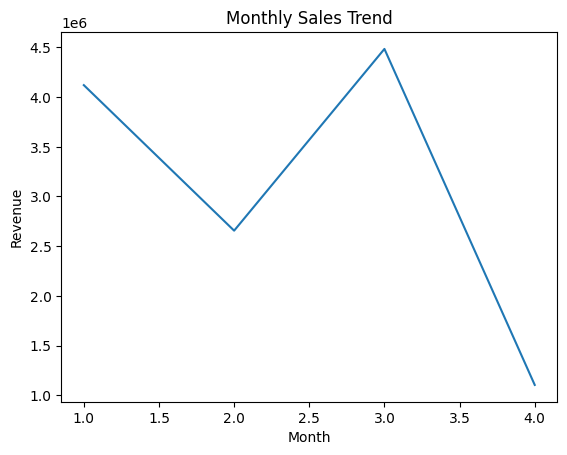

In [14]:
# 12. Line Chart
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

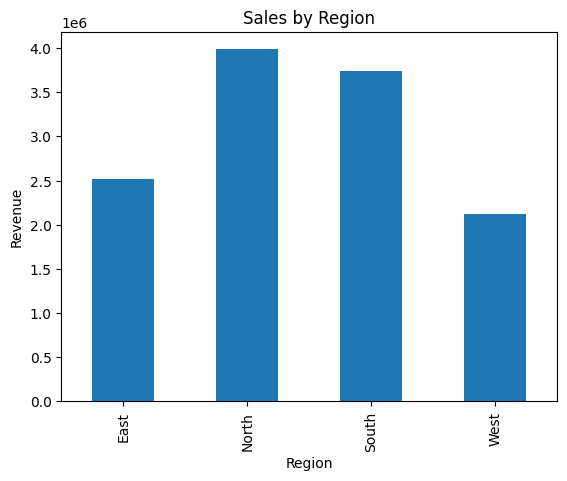

In [13]:
# 13. Bar Chart
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


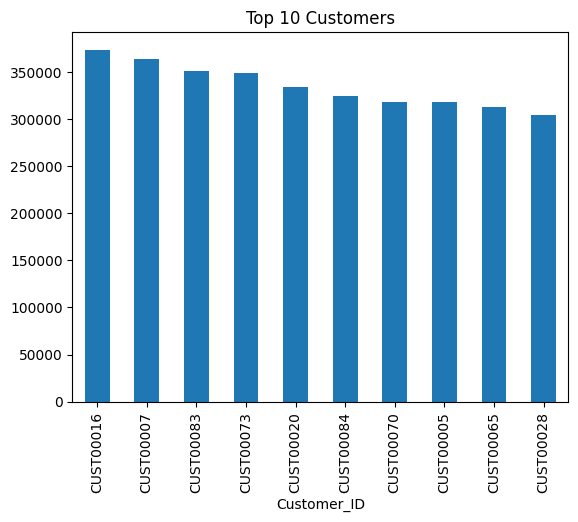

In [16]:
# 14. Top 10 Customers
top_customers.head(10).plot(kind="bar")
plt.title("Top 10 Customers")
plt.show()

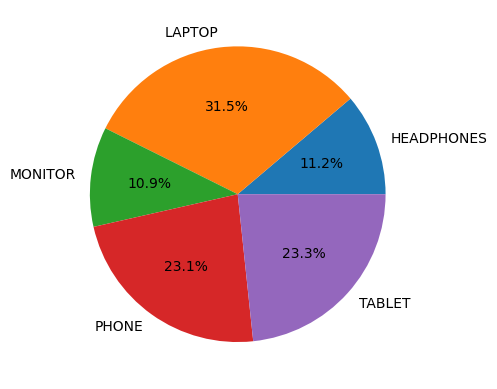

In [14]:
# 15. Product Share 
merged.groupby("Product")["Total_Sales"].sum().plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.show()

# 16.Business Insight

North region generates highest revenue  
Laptop is best-selling product  
Sales peak during March  
Top 10 customers contribute majority of revenue  
Recommendation: focus marketing on high-value customers and best regions


In [15]:


from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import matplotlib.pyplot as plt

# ---------- Save Charts ----------
merged.groupby("Month")["Total_Sales"].sum().plot()
plt.savefig("monthly.png")
plt.close()

merged.groupby("Region")["Total_Sales"].sum().plot(kind="bar")
plt.savefig("region.png")
plt.close()


total_revenue = merged["Total_Sales"].sum()
avg_order = merged["Total_Sales"].mean()
customers_cnt = merged["Customer_ID"].nunique()


# ---------- Create PDF ----------
doc = SimpleDocTemplate("analysis_report.pdf")
styles = getSampleStyleSheet()
elements = []

def add(text, style="BodyText"):
    elements.append(Paragraph(text, styles[style]))
    elements.append(Spacer(1, 12))


add("E-Commerce Sales Analysis Report", "Heading1")

add(f"Sales Rows: {len(sales)}")
add(f"Customer Rows: {len(customers)}")
add(f"Merged Rows: {len(merged)}")

add("<br/>Key Metrics", "Heading2")
add(f"Total Revenue: ₹{total_revenue:,.0f}")
add(f"Average Order Value: ₹{avg_order:,.0f}")
add(f"Unique Customers: {customers_cnt}")

add("<br/>Charts", "Heading2")
elements.append(Image("monthly.png", width=450, height=250))
elements.append(Spacer(1, 15))
elements.append(Image("region.png", width=450, height=250))

doc.build(elements)

print(" analysis_report.pdf generated")


 analysis_report.pdf generated
